In [47]:
#!/usr/bin/env python
#from __future__ import absolute_import, division, print_function
import numpy as np
import pandas as pd
import tensorflow
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import tensorflow as tf
from sklearn.preprocessing import normalize
import seaborn
import matplotlib.pyplot as plt
from keras.optimizers import Adadelta
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix 

In [48]:
data=pd.read_excel('A:\credit_cards-master\credit_cards-master\default of credit card clients.xls')
data.dropna(inplace=True)

print(data.shape)

(30001, 24)


In [49]:
data.drop_duplicates(inplace=True)

In [50]:
print(data.shape)

(29966, 24)


In [51]:
y=data.Y
y.drop(axis=1,index=['ID'],inplace=True)
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values
X=data.drop(columns='Y')
#X=data
X.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000


In [52]:
type(X)
X.drop(axis=1,index=['ID'],inplace=True)
X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [53]:
#normalise
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
#X=normalize(X, norm='l2', axis=1, copy=True, return_norm=False)
#print(X[:6])

C:\Users\paulm\Anaconda3\envs\pyten\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\paulm\Anaconda3\envs\pyten\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


KeyError: 'Y'

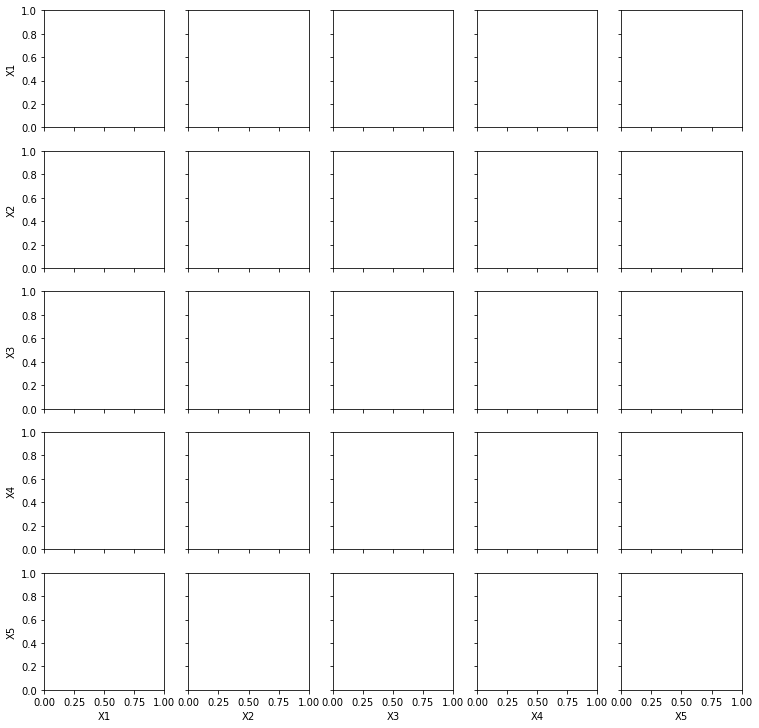

In [54]:
X_plot=pd.DataFrame(X)
seaborn.pairplot(X_plot,hue='Y',vars=["X1", "X2","X3","X4","X5"])
plt.show()

In [ ]:
#y=data['Y']

print(y.head(5))

In [ ]:
X_plot=pd.DataFrame(X)
seaborn.pairplot(X_plot)
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
#reshapes
#X_train=X_train.as_matrix()
#X_test=X_test.as_matrix()
print(type(X_test))
#X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1,1)
#X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1,1)

<class 'numpy.ndarray'>


In [57]:
#create model
model = Sequential()

#add model layers
model.add(Dense(32, activation='relu',input_shape=(23,)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(128, activation='tanh'))
#model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

In [58]:
#compile model using accuracy to measure model performance
opt = Adadelta()
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                768       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 15,361
Trainable params: 15,361
Non-trainable params: 0
_________________________________________________________________


In [60]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=800,verbose=True)

Train on 23972 samples, validate on 5993 samples
Epoch 1/800
23972/23972 [==============================] - 1s 49us/step - loss: 0.1342 - acc: 0.8233 - val_loss: 0.1368 - val_acc: 0.8170
Epoch 2/800
23972/23972 [==============================] - 1s 48us/step - loss: 0.1340 - acc: 0.8223 - val_loss: 0.1369 - val_acc: 0.8163
Epoch 3/800
23972/23972 [==============================] - 1s 47us/step - loss: 0.1337 - acc: 0.8232 - val_loss: 0.1381 - val_acc: 0.8146
Epoch 4/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.1339 - acc: 0.8219 - val_loss: 0.1392 - val_acc: 0.8145
Epoch 5/800
23972/23972 [==============================] - 1s 47us/step - loss: 0.1334 - acc: 0.8228 - val_loss: 0.1388 - val_acc: 0.8134
Epoch 6/800
23972/23972 [==============================] - 1s 48us/step - loss: 0.1331 - acc: 0.8230 - val_loss: 0.1381 - val_acc: 0.8134
Epoch 7/800
23972/23972 [==============================] - 1s 48us/step - loss: 0.1329 - acc: 0.8229 - val_loss: 0.1382 - v

23972/23972 [==============================] - 1s 45us/step - loss: 0.1239 - acc: 0.8375 - val_loss: 0.1461 - val_acc: 0.8076
Epoch 60/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.1239 - acc: 0.8377 - val_loss: 0.1489 - val_acc: 0.8081
Epoch 61/800
23972/23972 [==============================] - 1s 45us/step - loss: 0.1231 - acc: 0.8379 - val_loss: 0.1479 - val_acc: 0.8076
Epoch 62/800
23972/23972 [==============================] - 1s 45us/step - loss: 0.1230 - acc: 0.8390 - val_loss: 0.1546 - val_acc: 0.8006
Epoch 63/800
23972/23972 [==============================] - 1s 45us/step - loss: 0.1224 - acc: 0.8402 - val_loss: 0.1469 - val_acc: 0.8094
Epoch 64/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.1225 - acc: 0.8403 - val_loss: 0.1494 - val_acc: 0.8094
Epoch 65/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.1225 - acc: 0.8409 - val_loss: 0.1505 - val_acc: 0.8028
Epoch 66/800
23972/23972 [==============

Epoch 118/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.1041 - acc: 0.8643 - val_loss: 0.1643 - val_acc: 0.7969
Epoch 119/800
23972/23972 [==============================] - 1s 44us/step - loss: 0.1037 - acc: 0.8668 - val_loss: 0.1610 - val_acc: 0.7949
Epoch 120/800
23972/23972 [==============================] - 1s 45us/step - loss: 0.1036 - acc: 0.8655 - val_loss: 0.1659 - val_acc: 0.7964
Epoch 121/800
23972/23972 [==============================] - 1s 44us/step - loss: 0.1030 - acc: 0.8675 - val_loss: 0.1841 - val_acc: 0.7717
Epoch 122/800
23972/23972 [==============================] - 1s 45us/step - loss: 0.1028 - acc: 0.8685 - val_loss: 0.1655 - val_acc: 0.7889
Epoch 123/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.1023 - acc: 0.8685 - val_loss: 0.1677 - val_acc: 0.7884
Epoch 124/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.1017 - acc: 0.8693 - val_loss: 0.1635 - val_acc: 0.7958
Epoch 125/800
23972/

23972/23972 [==============================] - 1s 47us/step - loss: 0.0849 - acc: 0.8945 - val_loss: 0.1833 - val_acc: 0.7787
Epoch 177/800
23972/23972 [==============================] - 1s 52us/step - loss: 0.0844 - acc: 0.8952 - val_loss: 0.1816 - val_acc: 0.7827
Epoch 178/800
23972/23972 [==============================] - 1s 48us/step - loss: 0.0840 - acc: 0.8963 - val_loss: 0.1856 - val_acc: 0.7794
Epoch 179/800
23972/23972 [==============================] - 1s 51us/step - loss: 0.0838 - acc: 0.8962 - val_loss: 0.1900 - val_acc: 0.7794
Epoch 180/800
23972/23972 [==============================] - 1s 52us/step - loss: 0.0837 - acc: 0.8950 - val_loss: 0.1893 - val_acc: 0.7762
Epoch 181/800
23972/23972 [==============================] - 1s 51us/step - loss: 0.0833 - acc: 0.8955 - val_loss: 0.1903 - val_acc: 0.7776
Epoch 182/800
23972/23972 [==============================] - 1s 53us/step - loss: 0.0830 - acc: 0.8976 - val_loss: 0.1973 - val_acc: 0.7786
Epoch 183/800
23972/23972 [=======

23972/23972 [==============================] - 1s 51us/step - loss: 0.0692 - acc: 0.9182 - val_loss: 0.2025 - val_acc: 0.7661
Epoch 235/800
23972/23972 [==============================] - 1s 47us/step - loss: 0.0692 - acc: 0.9181 - val_loss: 0.2053 - val_acc: 0.7631
Epoch 236/800
23972/23972 [==============================] - 1s 48us/step - loss: 0.0687 - acc: 0.9189 - val_loss: 0.1921 - val_acc: 0.7781
Epoch 237/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.0681 - acc: 0.9195 - val_loss: 0.2017 - val_acc: 0.7719
Epoch 238/800
23972/23972 [==============================] - 1s 51us/step - loss: 0.0681 - acc: 0.9196 - val_loss: 0.2012 - val_acc: 0.7679
Epoch 239/800
23972/23972 [==============================] - 1s 48us/step - loss: 0.0681 - acc: 0.9190 - val_loss: 0.1950 - val_acc: 0.7746
Epoch 240/800
23972/23972 [==============================] - 1s 47us/step - loss: 0.0680 - acc: 0.9184 - val_loss: 0.2043 - val_acc: 0.7676
Epoch 241/800
23972/23972 [=======

23972/23972 [==============================] - 1s 50us/step - loss: 0.0593 - acc: 0.9323 - val_loss: 0.2068 - val_acc: 0.7711
Epoch 293/800
23972/23972 [==============================] - 1s 52us/step - loss: 0.0587 - acc: 0.9324 - val_loss: 0.2111 - val_acc: 0.7664
Epoch 294/800
23972/23972 [==============================] - 1s 50us/step - loss: 0.0593 - acc: 0.9324 - val_loss: 0.2104 - val_acc: 0.7726
Epoch 295/800
23972/23972 [==============================] - 1s 47us/step - loss: 0.0589 - acc: 0.9327 - val_loss: 0.2116 - val_acc: 0.7679
Epoch 296/800
23972/23972 [==============================] - 1s 52us/step - loss: 0.0592 - acc: 0.9327 - val_loss: 0.2067 - val_acc: 0.7694
Epoch 297/800
23972/23972 [==============================] - 1s 51us/step - loss: 0.0587 - acc: 0.9327 - val_loss: 0.2067 - val_acc: 0.7741
Epoch 298/800
23972/23972 [==============================] - 1s 49us/step - loss: 0.0582 - acc: 0.9339 - val_loss: 0.2154 - val_acc: 0.7657
Epoch 299/800
23972/23972 [=======

23972/23972 [==============================] - 1s 49us/step - loss: 0.0523 - acc: 0.9413 - val_loss: 0.2132 - val_acc: 0.7661
Epoch 351/800
23972/23972 [==============================] - 1s 49us/step - loss: 0.0525 - acc: 0.9410 - val_loss: 0.2171 - val_acc: 0.7626
Epoch 352/800
23972/23972 [==============================] - 1s 51us/step - loss: 0.0524 - acc: 0.9413 - val_loss: 0.2115 - val_acc: 0.7642
Epoch 353/800
23972/23972 [==============================] - 1s 50us/step - loss: 0.0521 - acc: 0.9422 - val_loss: 0.2145 - val_acc: 0.7662
Epoch 354/800
23972/23972 [==============================] - 1s 48us/step - loss: 0.0519 - acc: 0.9413 - val_loss: 0.2136 - val_acc: 0.7659
Epoch 355/800
23972/23972 [==============================] - 1s 48us/step - loss: 0.0523 - acc: 0.9411 - val_loss: 0.2230 - val_acc: 0.7622
Epoch 356/800
23972/23972 [==============================] - 1s 48us/step - loss: 0.0521 - acc: 0.9421 - val_loss: 0.2218 - val_acc: 0.7621
Epoch 357/800
23972/23972 [=======

23972/23972 [==============================] - 1s 49us/step - loss: 0.0473 - acc: 0.9489 - val_loss: 0.2218 - val_acc: 0.7596
Epoch 409/800
23972/23972 [==============================] - 1s 48us/step - loss: 0.0471 - acc: 0.9477 - val_loss: 0.2176 - val_acc: 0.7587
Epoch 410/800
23972/23972 [==============================] - 1s 47us/step - loss: 0.0479 - acc: 0.9471 - val_loss: 0.2352 - val_acc: 0.7480
Epoch 411/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.0469 - acc: 0.9490 - val_loss: 0.2264 - val_acc: 0.7525
Epoch 412/800
23972/23972 [==============================] - 1s 48us/step - loss: 0.0477 - acc: 0.9484 - val_loss: 0.2322 - val_acc: 0.7505
Epoch 413/800
23972/23972 [==============================] - 1s 47us/step - loss: 0.0472 - acc: 0.9484 - val_loss: 0.2246 - val_acc: 0.7574
Epoch 414/800
23972/23972 [==============================] - 1s 48us/step - loss: 0.0465 - acc: 0.9491 - val_loss: 0.2125 - val_acc: 0.7642
Epoch 415/800
23972/23972 [=======

23972/23972 [==============================] - 1s 53us/step - loss: 0.0436 - acc: 0.9531 - val_loss: 0.2292 - val_acc: 0.7534
Epoch 467/800
23972/23972 [==============================] - 1s 52us/step - loss: 0.0436 - acc: 0.9525 - val_loss: 0.2390 - val_acc: 0.7507
Epoch 468/800
23972/23972 [==============================] - 1s 51us/step - loss: 0.0437 - acc: 0.9533 - val_loss: 0.2241 - val_acc: 0.7624
Epoch 469/800
23972/23972 [==============================] - 1s 47us/step - loss: 0.0434 - acc: 0.9539 - val_loss: 0.2272 - val_acc: 0.7632
Epoch 470/800
23972/23972 [==============================] - 1s 53us/step - loss: 0.0433 - acc: 0.9534 - val_loss: 0.2236 - val_acc: 0.7629
Epoch 471/800
23972/23972 [==============================] - 1s 55us/step - loss: 0.0432 - acc: 0.9542 - val_loss: 0.2276 - val_acc: 0.7579
Epoch 472/800
23972/23972 [==============================] - 1s 51us/step - loss: 0.0434 - acc: 0.9530 - val_loss: 0.2342 - val_acc: 0.7520
Epoch 473/800
23972/23972 [=======

23972/23972 [==============================] - 1s 52us/step - loss: 0.0402 - acc: 0.9574 - val_loss: 0.2339 - val_acc: 0.7477
Epoch 525/800
23972/23972 [==============================] - 1s 50us/step - loss: 0.0401 - acc: 0.9577 - val_loss: 0.2301 - val_acc: 0.7577
Epoch 526/800
23972/23972 [==============================] - 1s 47us/step - loss: 0.0400 - acc: 0.9576 - val_loss: 0.2483 - val_acc: 0.7410
Epoch 527/800
23972/23972 [==============================] - 1s 49us/step - loss: 0.0406 - acc: 0.9564 - val_loss: 0.2328 - val_acc: 0.7509
Epoch 528/800
23972/23972 [==============================] - 1s 48us/step - loss: 0.0400 - acc: 0.9582 - val_loss: 0.2386 - val_acc: 0.7524
Epoch 529/800
23972/23972 [==============================] - 1s 50us/step - loss: 0.0404 - acc: 0.9569 - val_loss: 0.2494 - val_acc: 0.7397
Epoch 530/800
23972/23972 [==============================] - 1s 47us/step - loss: 0.0396 - acc: 0.9592 - val_loss: 0.2376 - val_acc: 0.7524
Epoch 531/800
23972/23972 [=======

23972/23972 [==============================] - 1s 47us/step - loss: 0.0378 - acc: 0.9602 - val_loss: 0.2323 - val_acc: 0.7537
Epoch 583/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.0376 - acc: 0.9611 - val_loss: 0.2266 - val_acc: 0.7599
Epoch 584/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.0369 - acc: 0.9617 - val_loss: 0.2342 - val_acc: 0.7502
Epoch 585/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.0377 - acc: 0.9604 - val_loss: 0.2395 - val_acc: 0.7544
Epoch 586/800
23972/23972 [==============================] - 1s 45us/step - loss: 0.0381 - acc: 0.9600 - val_loss: 0.2356 - val_acc: 0.7517
Epoch 587/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.0375 - acc: 0.9606 - val_loss: 0.2400 - val_acc: 0.7524
Epoch 588/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.0370 - acc: 0.9615 - val_loss: 0.2322 - val_acc: 0.7587
Epoch 589/800
23972/23972 [=======

23972/23972 [==============================] - 1s 54us/step - loss: 0.0354 - acc: 0.9635 - val_loss: 0.2355 - val_acc: 0.7515
Epoch 641/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.0352 - acc: 0.9630 - val_loss: 0.2400 - val_acc: 0.7480
Epoch 642/800
23972/23972 [==============================] - 1s 45us/step - loss: 0.0354 - acc: 0.9648 - val_loss: 0.2415 - val_acc: 0.7492
Epoch 643/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.0350 - acc: 0.9643 - val_loss: 0.2411 - val_acc: 0.7497
Epoch 644/800
23972/23972 [==============================] - 1s 51us/step - loss: 0.0346 - acc: 0.9642 - val_loss: 0.2336 - val_acc: 0.7539
Epoch 645/800
23972/23972 [==============================] - 1s 47us/step - loss: 0.0349 - acc: 0.9640 - val_loss: 0.2530 - val_acc: 0.7432
Epoch 646/800
23972/23972 [==============================] - 1s 49us/step - loss: 0.0348 - acc: 0.9637 - val_loss: 0.2391 - val_acc: 0.7514
Epoch 647/800
23972/23972 [=======

23972/23972 [==============================] - 1s 46us/step - loss: 0.0331 - acc: 0.9673 - val_loss: 0.2377 - val_acc: 0.7524
Epoch 699/800
23972/23972 [==============================] - 1s 44us/step - loss: 0.0330 - acc: 0.9666 - val_loss: 0.2505 - val_acc: 0.7399
Epoch 700/800
23972/23972 [==============================] - 1s 51us/step - loss: 0.0329 - acc: 0.9668 - val_loss: 0.2433 - val_acc: 0.7527
Epoch 701/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.0328 - acc: 0.9666 - val_loss: 0.2422 - val_acc: 0.7510
Epoch 702/800
23972/23972 [==============================] - 1s 45us/step - loss: 0.0326 - acc: 0.9657 - val_loss: 0.2386 - val_acc: 0.7469
Epoch 703/800
23972/23972 [==============================] - 1s 49us/step - loss: 0.0330 - acc: 0.9672 - val_loss: 0.2367 - val_acc: 0.7510
Epoch 704/800
23972/23972 [==============================] - 1s 46us/step - loss: 0.0332 - acc: 0.9661 - val_loss: 0.2363 - val_acc: 0.7517
Epoch 705/800
23972/23972 [=======

23972/23972 [==============================] - 1s 55us/step - loss: 0.0316 - acc: 0.9677 - val_loss: 0.2357 - val_acc: 0.7549
Epoch 757/800
23972/23972 [==============================] - 1s 48us/step - loss: 0.0308 - acc: 0.9692 - val_loss: 0.2474 - val_acc: 0.7455
Epoch 758/800
23972/23972 [==============================] - 1s 52us/step - loss: 0.0317 - acc: 0.9679 - val_loss: 0.2343 - val_acc: 0.7524
Epoch 759/800
23972/23972 [==============================] - 1s 53us/step - loss: 0.0313 - acc: 0.9694 - val_loss: 0.2307 - val_acc: 0.7591
Epoch 760/800
23972/23972 [==============================] - 1s 56us/step - loss: 0.0314 - acc: 0.9684 - val_loss: 0.2405 - val_acc: 0.7489
Epoch 761/800
23972/23972 [==============================] - 1s 58us/step - loss: 0.0316 - acc: 0.9685 - val_loss: 0.2380 - val_acc: 0.7485
Epoch 762/800
23972/23972 [==============================] - 1s 52us/step - loss: 0.0313 - acc: 0.9685 - val_loss: 0.2447 - val_acc: 0.7519
Epoch 763/800
23972/23972 [=======

In [61]:
y_test=y_test.as_matrix()

C:\Users\paulm\Anaconda3\envs\pyten\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [65]:
p=model.predict_classes(X_test)
print(y_test)
y_test=list(y_test)
#print(y_test[:100])
p=p.ravel()
p=list(p)
print(p)
#pp=p.sum()
#yy=y_test.sum()
#print(pp,yy)


[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

In [66]:
print(accuracy_score(y_test,p))

0.749874853996329
